In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
%matplotlib inline
import matplotlib.pyplot as plt

# データ作成

In [2]:
# データの読み込み
(X_train, _), (X_test, _) = mnist.load_data()

# 前処理
height, width = 28, 28
input_shape = height * width
X_train, X_test = X_train.astype('float32') / 255, X_test.astype('float32') / 255    # [0, 1]
X_train, X_test = X_train.reshape(-1, input_shape), X_test.reshape(-1, input_shape)  # 1次元化

# モデル作成

In [3]:
latent_var = 64  # 潜在変数次元数
inputs = Input(shape=(input_shape, ))
# エンコーダー
encoded = Dense(latent_var, activation='relu')(inputs)
# デコーダー
decoded = Dense(input_shape, activation='sigmoid')(encoded)
# AutoEncoder
autoencoder = Model(inputs=inputs, outputs=decoded)
# モデルコンパイル
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
None


# 学習

In [4]:
history = autoencoder.fit(X_train, X_train, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2095 - val_loss: 0.0986
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0924 - val_loss: 0.0819
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0798 - val_loss: 0.0779
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0765 - val_loss: 0.0762
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0754 - val_loss: 0.0757
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0748 - val_loss: 0.0752
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0743 - val_loss: 0.0750
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0742 - val_loss: 0.0749
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0738 - val_loss: 0.0747
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.073

## 学習過程の可視化

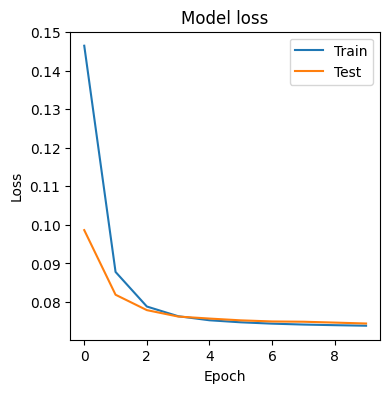

In [5]:
plt.figure(figsize=(4, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# 予測

In [6]:
pred = autoencoder.predict(X_test)

## 予測の可視化

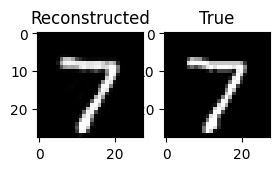

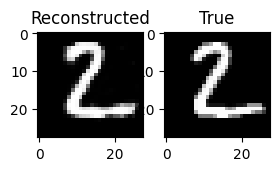

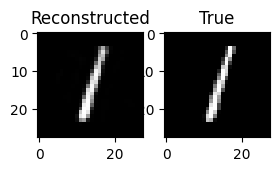

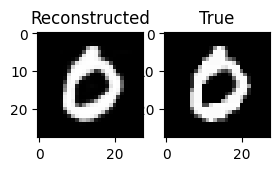

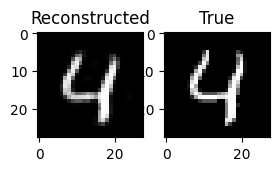

In [7]:
num_figures = 5  # 表示画像数
for p, t in zip(pred[:num_figures], X_test[:num_figures]):
    fig, ax = plt.subplots(1, 2, figsize=(3, 4))
    ax[0].imshow(p.reshape(height, width)*255, cmap='gray')
    ax[1].imshow(t.reshape(height, width)*255, cmap='gray')
    ax[0].set_title('Reconstructed')
    ax[1].set_title('True')
    plt.show()

# ノイズ画像の再構成

## ノイズ画像作成

In [9]:
import numpy as np

# データの読み込み
(_, _), (X_test, _) = mnist.load_data()

# ランダムノイズの追加
noise = np.random.randint(0, 64, (28, 28))
X_test = np.where(X_test + noise > 255, 255, X_test + noise)

# 前処理
height, width = 28, 28
input_shape = height * width
X_test = X_test.astype('float32') / 255   # [0, 1]
X_test = X_test.reshape(-1, input_shape)  # 1次元化

## ノイズ画像可視化

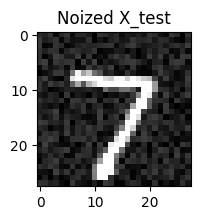

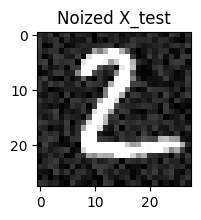

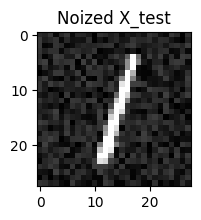

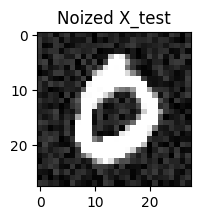

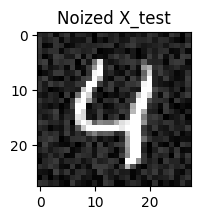

In [13]:
num_figures = 5  # 表示画像数
for nt in X_test[:num_figures]:
    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    ax.imshow(nt.reshape(height, width) * 255, cmap='gray')
    ax.set_title('Noized X_test')
    plt.show()

# 予測

In [11]:
pred = autoencoder.predict(X_test)

## 予測の可視化

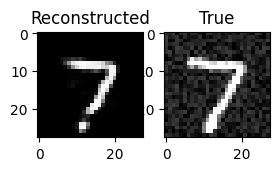

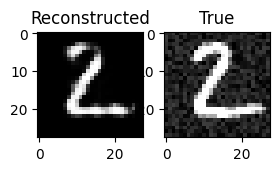

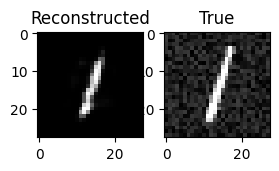

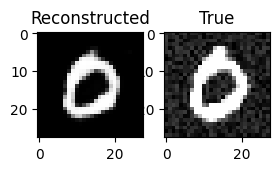

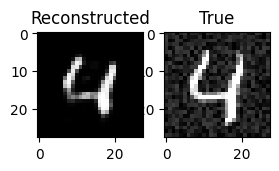

In [12]:
num_figures = 5  # 表示画像数
for p, t in zip(pred[:num_figures], X_test[:num_figures]):
    fig, ax = plt.subplots(1, 2, figsize=(3, 4))
    ax[0].imshow(p.reshape(height, width)*255, cmap='gray')
    ax[1].imshow(t.reshape(height, width)*255, cmap='gray')
    ax[0].set_title('Reconstructed')
    ax[1].set_title('True')
    plt.show()